### Computational Drug Discovery Project
Author: Antoine Ruzette

!! Shout out to the data professor for his series on a Bioinformatics project for computational drug discovery. https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb. 

#### 1. Pre-processing of the bioactivity data (IC50) from ChEMBL database
##### 1.1 Retrieving data

In [8]:
#accessing the chembl database API
! pip install chembl_webresource_client

  Using cached easydict-1.9.tar.gz (6.4 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6350 sha256=fcd213f15626834fe104d2693c9ecfacf3af6f3bac0d78abcc2762c6aaff1472
  Stored in directory: c:\users\antoi\appdata\local\pip\cache\wheels\88\96\68\c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


In [5]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np

In [8]:
#as in a website search bar, we query for a certain key word (i.e. coronavirus)

target = new_client.target
target_query = target.search("coronavirus")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [9]:
#select a target, namely SARS coronavirus 3C-like proteinase

selected_target = targets.target_chembl_id[4]
print("CHEMBL ID OF SELECTED TARGET: " + selected_target)

CHEMBL ID OF SELECTED TARGET: CHEMBL3927


In [10]:
#retrieve bioactivity data for the selected target

bioactivity = new_client.activity
res = bioactivity.filter(target_chembl_id = selected_target).filter(standard_type = "IC50")
res_df = pd.DataFrame.from_dict(res)
print("SIZE OF THE DATAFRAME: ")
print(res_df.shape)
res_df.head(5)

SIZE OF THE DATAFRAME: 
(133, 45)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [11]:
#in case there exist duplicates, remove them

res_df.standard_type.unique()
print("SIZE OF THE DATAFRAME: ")
print(res_df.shape)#there are none

SIZE OF THE DATAFRAME: 
(133, 45)


In [12]:
#save the bioactivity data into a cvs file 
#automatically, the file is sent into the same folder than this notebook 

res_df.to_csv("bioactivity_data.csv", index= False)

In [13]:
res_df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [14]:
#checking for missing data
total_na_count = res_df.isna().sum().sum()
print("TOTAL MISSING VALUE: ")
print(total_na_count)

TOTAL MISSING VALUE: 
1465


We could get rid of many empty columns but instead we can restrict our predictor subset to only chembl id, target_organism, target_pref_name and standard value of bioactivity


In [1]:
res_df_sub = res_df[["molecule_chembl_id", "molecule_pref_name", 
                     "canonical_smiles", "standard_value", "target_chembl_id"]]
pd.to_numeric(res_df_sub["standard_value"], errors = 'coerce')
print("SIZE OF THE DATAFRAME: ")
print(res_df_sub.shape)
res_df_sub.head(5)

NameError: name 'res_df' is not defined

<u>Notes: </u>

<i>

- The bioactivity is the output of experiments designed to assess potential molecules inhibiting the 3C-like SARS coronavirus proteases. Here, it is measured using IC50. IC50 stands for inhibitory concentration 50%. That is, the concentration of inhibitor required to reduce the biological activity of interest (e.g. the 3CL coronavirus proteases) to half of the uninhibited value (Note that it is less precise that a constant of equilibrim of a binding equilibrium such as as Ki or Kd).
    
- The document ChEMBL ID is the ID of the research paper of the experiment. 

- The molecule ChEMBL ID is the ID of the potential inhibiting molecule.

- The target ChEMBL ID is the ID of the molecule targeted by the potential inhibiting molecule (e.g. potential drug). </i>


##### 1.2 Classification of the bioactivity values

In [16]:
#classifying the bioactivity values into active, intermediate and inactive states
#a low standard value means that it has a strong inhibiting effect on the protease receptors, thus being active

final_df = res_df_sub
final_df["bioactivity_class"] = np.where(pd.to_numeric(final_df["standard_value"]) < 1000, "active", np.where(pd.to_numeric(final_df["standard_value"]) > 10000, "inactive", "intermediate"))
#a warning is reported but seems that it can be ignored

#checking if the command went as planned
print("TOTAL NUMBER OF MISSING VALUES: ")
print(final_df["bioactivity_class"].isna().sum().sum()) #we only have some missing data in the molecule's name
final_df

TOTAL NUMBER OF MISSING VALUES: 
0


<ipython-input-16-38df1993383e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["bioactivity_class"] = np.where(pd.to_numeric(final_df["standard_value"]) < 1000, "active", np.where(pd.to_numeric(final_df["standard_value"]) > 10000, "inactive", "intermediate"))


,molecule_chembl_id,molecule_pref_name,canonical_smiles,standard_value,target_chembl_id,bioactivity_class
0,CHEMBL187579,None,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,CHEMBL3927,intermediate
1,CHEMBL188487,None,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,CHEMBL3927,intermediate
2,CHEMBL185698,None,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,CHEMBL3927,inactive
3,CHEMBL426082,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,CHEMBL3927,inactive
4,CHEMBL187717,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,CHEMBL3927,intermediate
...,...,...,...,...,...,...
128,CHEMBL2146517,METHYL TANSHINONATE,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,CHEMBL3927,inactive
129,CHEMBL187460,CRYPTOTANSHINONE,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,CHEMBL3927,inactive
130,CHEMBL363535,TANSHINONE I,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,CHEMBL3927,inactive
131,CHEMBL227075,DIHYDROTANSHINONE I,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,CHEMBL3927,inactive


In [17]:
#save the data into a csv file
res_df_sub.to_csv("bioactivity_class.csv", index = False)

In [1]:
import rdkit
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

python: can't open file 'import': [Errno 2] No such file or directory


ModuleNotFoundError: No module named 'rdkit'

##### 1.3 Calculation of Lipinski descriptors and pIC50 conversion

In [19]:
#calculate Lipinski descriptors (Source of the lipinski function:  https://codeocean.com/explore/capsules?query=tag:data-curation)

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [20]:
#apply lipinski function on the smiles data
descriptors_df = pd.DataFrame.from_dict(lipinski(final_df["canonical_smiles"]))
descriptors_df.head(5)

NameError: name 'Chem' is not defined

In [194]:
#combine the lipinski descriptors to the global data frame
combined_df = pd.concat([final_df, descriptors_df], axis = 1)
print("DATAFRAME INFORMATION: ")
print(combined_df.info())
combined_df.head(5)

DATAFRAME INFORMATION: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  133 non-null    object 
 1   molecule_pref_name  26 non-null     object 
 2   canonical_smiles    133 non-null    object 
 3   standard_value      133 non-null    object 
 4   target_chembl_id    133 non-null    object 
 5   bioactivity_class   133 non-null    object 
 6   MW                  133 non-null    float64
 7   LogP                133 non-null    float64
 8   NumHDonors          133 non-null    float64
 9   NumHAcceptors       133 non-null    float64
dtypes: float64(4), object(6)
memory usage: 10.5+ KB
None


,molecule_chembl_id,molecule_pref_name,canonical_smiles,standard_value,target_chembl_id,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,None,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,CHEMBL3927,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,None,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,CHEMBL3927,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,None,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,CHEMBL3927,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,CHEMBL3927,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,CHEMBL3927,intermediate,338.344,3.53900,0.0,5.0


In [4]:
#first, we apply a normalization to avoid negative pIC50 and convert bioactivity standard value to numeric (from object)
#important note: need to type cast using int(float()) to match the datatype in the dataframe  

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if int(float(i)) > 100000000:
          i = 100000000
        norm.append(i)

    input['norm_standard_value'] = norm
    x = input.drop('standard_value', 1)
        
    return x

norm_combined_df = norm_value(combined_df)

NameError: name 'combined_df' is not defined

In [196]:
print("DATAFRAME INFORMATION: ")
print(norm_combined_df.info())
norm_combined_df

DATAFRAME INFORMATION: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   molecule_chembl_id   133 non-null    object 
 1   molecule_pref_name   26 non-null     object 
 2   canonical_smiles     133 non-null    object 
 3   target_chembl_id     133 non-null    object 
 4   bioactivity_class    133 non-null    object 
 5   MW                   133 non-null    float64
 6   LogP                 133 non-null    float64
 7   NumHDonors           133 non-null    float64
 8   NumHAcceptors        133 non-null    float64
 9   norm_standard_value  133 non-null    object 
dtypes: float64(4), object(6)
memory usage: 10.5+ KB
None


,molecule_chembl_id,molecule_pref_name,canonical_smiles,target_chembl_id,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,norm_standard_value
0,CHEMBL187579,None,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL3927,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,None,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL3927,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,None,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL3927,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,CHEMBL3927,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],CHEMBL3927,intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,METHYL TANSHINONATE,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,CHEMBL3927,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,CRYPTOTANSHINONE,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,CHEMBL3927,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,TANSHINONE I,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,CHEMBL3927,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,DIHYDROTANSHINONE I,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,CHEMBL3927,inactive,278.307,3.29102,0.0,3.0,10700.0


In [202]:
#convert IC50 to pIC50 
#from https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb
#remark: need to type cast i to float() in order to avoid a "can't multiply sequence by non-int of type 'float'" error

def pIC50(input):
    pIC50 = []

    for i in input['norm_standard_value']:
        molar = float(i)*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('norm_standard_value', 1)
        
    return x

norm_combined_df2 = pIC50(norm_combined_df)
norm_combined_df2

C:\Users\antoi\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,molecule_pref_name,canonical_smiles,target_chembl_id,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,None,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL3927,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,None,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL3927,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,None,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL3927,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,CHEMBL3927,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],CHEMBL3927,intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,METHYL TANSHINONATE,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,CHEMBL3927,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,CRYPTOTANSHINONE,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,CHEMBL3927,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,TANSHINONE I,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,CHEMBL3927,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,DIHYDROTANSHINONE I,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,CHEMBL3927,inactive,278.307,3.29102,0.0,3.0,4.970616


In [201]:
print("CHECK MIN AND MAX VALUE OF pIC50: ")#min should be 1 (not negative at least)
print(norm_combined_df2['pIC50'].describe())

CHECK MIN AND MAX VALUE OF pIC50: 
count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64


In [203]:
#remove the intermediate bioactivity class
#the impact of removing it is acceptable due to the relatively small number of molecules in the intermediate class (only 26)

lipinski_combined_df = norm_combined_df2[norm_combined_df2["bioactivity_class"] != 'intermediate']
lipinski_combined_df

,molecule_chembl_id,molecule_pref_name,canonical_smiles,target_chembl_id,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,None,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL3927,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,CHEMBL3927,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,CHEMBL3927,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,CHEMBL3927,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,None,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,CHEMBL3927,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,METHYL TANSHINONATE,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,CHEMBL3927,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,CRYPTOTANSHINONE,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,CHEMBL3927,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,TANSHINONE I,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,CHEMBL3927,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,DIHYDROTANSHINONE I,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,CHEMBL3927,inactive,278.307,3.29102,0.0,3.0,4.970616


#### 2. Explanatory data analysis

In [99]:
#if needed
#! pip install seaborn

In [204]:
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt

##### 2.1 General graphical exploration of the data

Text(0.5, 1.0, 'Distribution of molecules in inactive and active class')

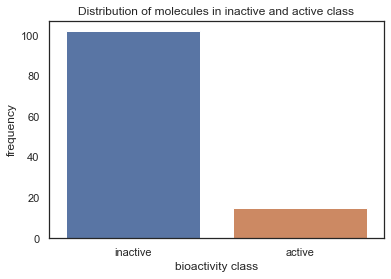

In [205]:
sns.countplot(x = 'bioactivity_class', data = lipinski_combined_df)

plt.xlabel('bioactivity class')
plt.ylabel('frequency')
plt.title('Distribution of molecules in inactive and active class')

#Observe the domination of inactive molecules compared to active ones 
#Actually logical as we are in a first run of screening

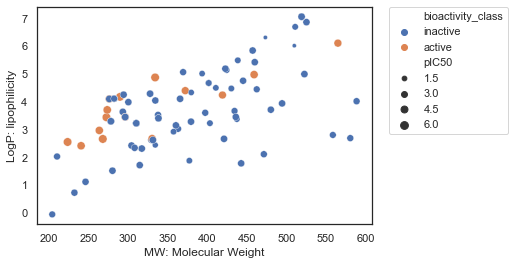

In [215]:
sns.scatterplot(x = 'MW', y = 'LogP', data = lipinski_combined_df, hue = 'bioactivity_class', size = 'pIC50')

plt.xlabel("MW: Molecular Weight")
plt.ylabel("LogP: lipophilicity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#the distribution of the two classes is similar

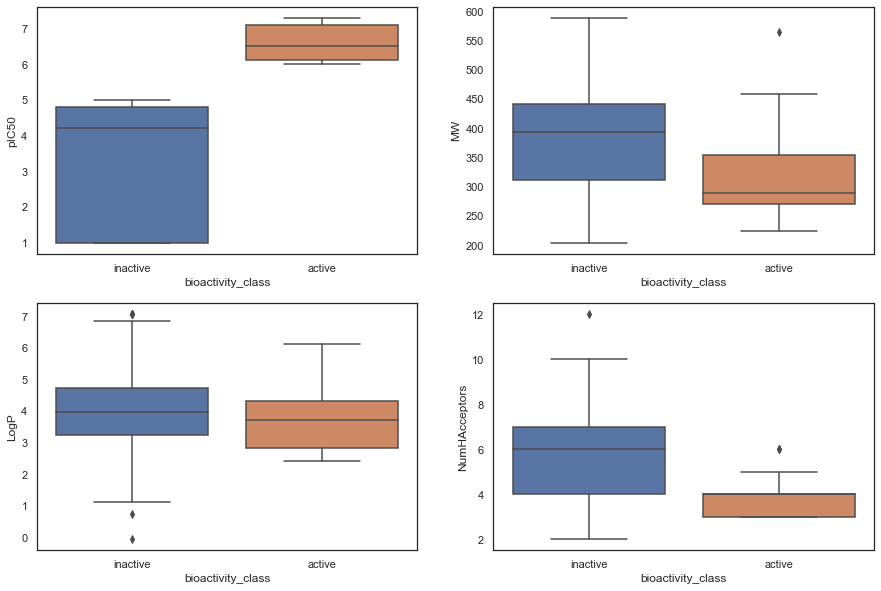

In [261]:
fig= plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt1 = sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = lipinski_combined_df)
plt.subplot(2, 2, 2)
plt2 = sns.boxplot(x = 'bioactivity_class', y = 'MW', data = lipinski_combined_df)
plt.subplot(2, 2, 3)
plt3 = sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = lipinski_combined_df)
plt.subplot(2, 2, 4)
plt4 = sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = lipinski_combined_df)


##### 2.2 Statistical analysis using Mann-Withney U test

In [262]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = lipinski_combined_df[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = lipinski_combined_df[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [263]:
#for pIC50
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1530.0,3.458028e-10,0.05,Different distribution (reject H0)


In [264]:
#for MW
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,404.5,0.003331,0.05,Different distribution (reject H0)


In [265]:
#for LogP
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,705.5,0.630457,0.05,Same distribution (fail to reject H0)


In [270]:
#for NumHdonnors
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,298.5,0.000059,0.05,Different distribution (reject H0)


In [271]:
#for NumHAcceptors
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,412.5,0.003635,0.05,Different distribution (reject H0)


In [281]:
! pip install wget
import wget

In [289]:
! pip install zipfile
import zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [282]:
! python -m wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! python -m wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


Saved under padel.zip

Saved under padel.sh


In [292]:
! python -m cat padel.sh

C:\Users\antoi\anaconda3\envs\my-rdkit-env\python.exe: No module named cat
